In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.constants import c, pi

from tqdm.notebook import tqdm  # Needs installation of jupyter and ipywidgets packages

import sys
sys.path.append('../')

try:
    import imp
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py')
except:
    print('imp module not found. Trying with importlib...')
    from importlib.machinery import SourceFileLoader
    try:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py').load_module()
    except:
        os.add_dll_directory('C:\\Program Files\\Lumerical\\v231\\api\\python\\')
        lumapi = SourceFileLoader('lumapi','C:\\Program Files\\Lumerical\\v231\\api\\python\\lumapi.py').load_module()

plt.rcParams["figure.figsize"] = (8,6) 
plt.rc('font', size=12)

imp module not found. Trying with importlib...


C:\Program Files\Lumerical\v202\api\python\lumapi.py:797: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
inter = lumapi.INTERCONNECT(filename='../cml/AnalysisCaio.icp')

# MZI Ideal Cell Test

In [189]:
inter.switchtolayout()
inter.deleteall()
inter.addelement('MZI Ideal Cell')
inter.set('x position',0)
inter.set('y position',300)
inter.addelement('Optical Network Analyzer')
inter.set('number of input ports',3)

inter.connect('ONA_1','output','IDEAL CELL_1','port 1')
inter.connect('ONA_1','input 1','IDEAL CELL_1','port 3')
inter.connect('ONA_1','input 2','IDEAL CELL_1','port 4')
inter.connect('ONA_1','input 3','IDEAL CELL_1','port 2')

1.0

  0%|          | 0/60 [00:00<?, ?it/s]

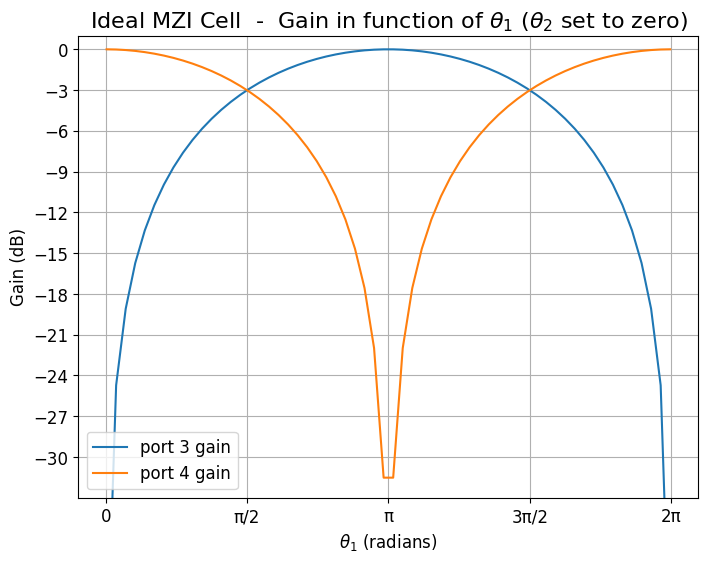

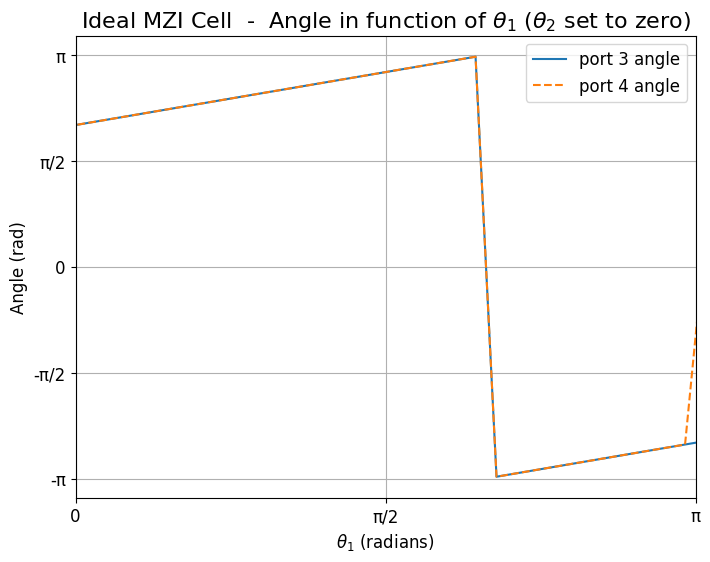

In [190]:
Theta1Array = np.linspace(0.01,2*pi-0.01,60)

progress = tqdm(total= len(Theta1Array))

Port1Gain = np.zeros(len(Theta1Array))
Port2Gain = np.zeros(len(Theta1Array))
Port1Angle = np.zeros(len(Theta1Array))
Port2Angle = np.zeros(len(Theta1Array))

for i in range(len(Theta1Array)):
    inter.switchtolayout()
    inter.setnamed('IDEAL CELL_1','Theta 1',Theta1Array[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][0]
    Port1Angle[i] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]
    Port2Angle[i] = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

plt.figure(figsize=(8,6))
plt.plot(Theta1Array,Port1Gain,label='port 3 gain')
plt.plot(Theta1Array,Port2Gain,label='port 4 gain')
plt.xlabel('$θ_1$ (radians)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Ideal MZI Cell  -  Gain in function of $θ_1$ ($θ_2$ set to zero)',fontsize=16)
dxArray = {'0':0 , 'π/2':pi/2 , 'π':pi, '3π/2':3*pi/2, '2π':2*pi}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
dyArray = [0,-3,-6,-9,-12,-15,-18,-21,-24,-27,-30]
plt.yticks(dyArray)
plt.ylim(-33,1)
plt.legend()
plt.grid()

datapath = '../Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain x Theta1" + ".png", transparent=False, facecolor="white", bbox_inches="tight")


plt.figure(figsize=(8,6))
plt.plot(Theta1Array,Port1Angle,label='port 3 angle')
plt.plot(Theta1Array,Port2Angle,'--',label='port 4 angle')
plt.xlabel('$θ_1$ (radians)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Ideal MZI Cell  -  Angle in function of $θ_1$ ($θ_2$ set to zero)',fontsize=16)
dxArray = {'0':0, 'π/2':pi/2 , 'π':pi, '3π/2':3*pi/2, '2π':2*pi}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
dyArray = {'-π':-pi , '-π/2':-pi/2, '0':0, 'π/2':pi/2, 'π':pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlim(0,pi)
plt.legend()
plt.grid()

datapath = '../Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Angle x Theta1" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

## MZI Splitter 1:4

![MZI Splitter 1:4](../Media/Ilustration/MZM_Splitter_1x4.png)

In [31]:
WvArray = np.linspace(1535,1560,1000)

inter.switchtolayout()
inter.deleteall()

inter.addelement('MZI Ideal Cell')
inter.set('x position',-300)
inter.set('y position',-300)
inter.addelement('MZI Ideal Cell')
inter.set('x position',0)
inter.set('y position',-400)
inter.addelement('MZI Ideal Cell')
inter.set('x position',0)
inter.set('y position',-200)

inter.addelement('Optical Network Analyzer')
inter.set('x position',-400)
inter.set('y position',-500)
inter.set('number of input ports',4)

inter.addelement('Termination Mirror')
inter.set('x position',-500)
inter.set('y position',-200)
inter.flipelement('TERM_1')
inter.addelement('Termination Mirror')
inter.set('x position',-200)
inter.set('y position',-100)
inter.flipelement('TERM_2')
inter.addelement('Termination Mirror')
inter.set('x position',-200)
inter.set('y position',-500)
inter.flipelement('TERM_3')

inter.connect('ONA_1','output','IDEAL_CELL_1','port 1')
inter.connect('ONA_1','input 1','IDEAL_CELL_2','port 3')
inter.connect('ONA_1','input 2','IDEAL_CELL_2','port 4')
inter.connect('ONA_1','input 3','IDEAL_CELL_3','port 3')
inter.connect('ONA_1','input 4','IDEAL_CELL_3','port 4')

inter.connect('IDEAL_CELL_1','port 3','IDEAL_CELL_2','port 2')
inter.connect('IDEAL_CELL_1','port 4','IDEAL_CELL_3','port 1')

inter.connect('TERM_1','port','IDEAL_CELL_1','port 2')
inter.connect('TERM_2','port','IDEAL_CELL_3','port 2')
inter.connect('TERM_3','port','IDEAL_CELL_2','port 1')

inter.setnamed('IDEAL_CELL_1','Theta 1',pi/2)
inter.setnamed('IDEAL_CELL_2','Theta 1',pi/2)
inter.setnamed('IDEAL_CELL_3','Theta 1',pi/2)

inter.setnamed('ONA_1','input parameter','start and stop')
inter.setnamed('ONA_1','start frequency',WvArray[0]*1e-9)
inter.setnamed('ONA_1','stop frequency',WvArray[-1]*1e-9)

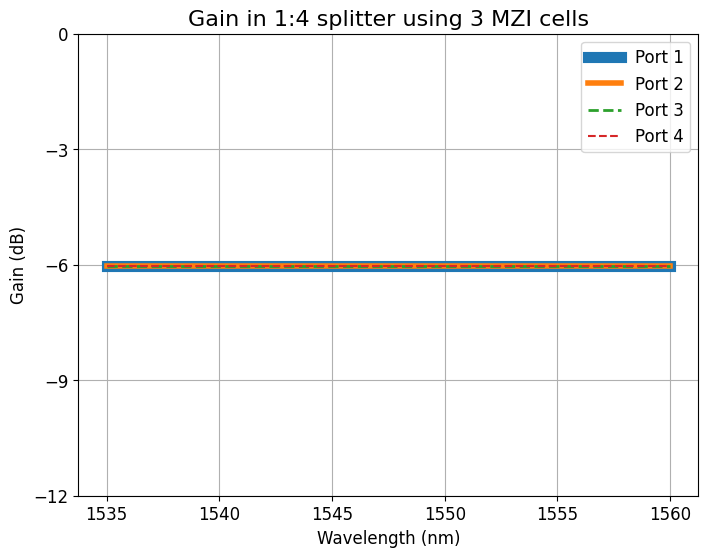

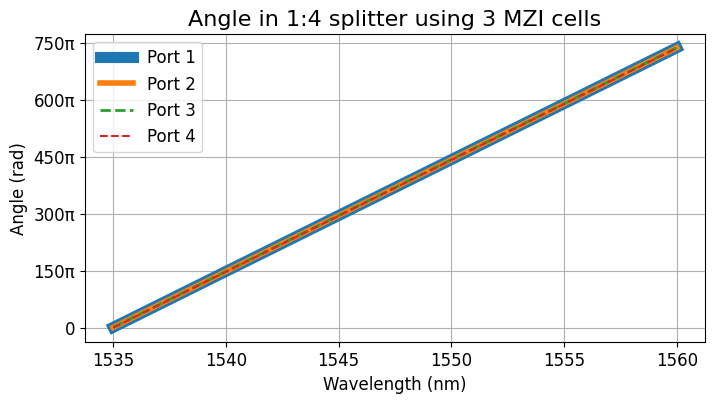

In [180]:
inter.switchtolayout()
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)']
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)']
Port3Gain = inter.getresult('ONA_1','input 3/mode 1/gain')['TE gain (dB)']
Port4Gain = inter.getresult('ONA_1','input 4/mode 1/gain')['TE gain (dB)']

Port1Angle = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)']
Port2Angle = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)']
Port3Angle = inter.getresult('ONA_1','input 3/mode 1/angle')['TE angle (rad)']
Port4Angle = inter.getresult('ONA_1','input 4/mode 1/angle')['TE angle (rad)']

plt.figure(figsize=(8,6))
plt.plot(WvArray,Port1Gain,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Gain,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Gain,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Gain,'--', label='Port 4')
dyArray = [0,-3,-6,-9,-12]
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Gain in 1:4 splitter using 3 MZI cells',fontsize=16)
plt.yticks(dyArray)
plt.legend()
plt.grid()

datapath = '../Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

plt.figure(figsize=(8,4))
plt.plot(WvArray,Port1Angle,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Angle,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Angle,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Angle,'--', label='Port 4')
dyArray = {'0':0 , '150π':150*pi , '300π':300*pi, '450π':450*pi, '600π':600*pi, '750π':750*pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Angle in 1:4 splitter using 3 MZI cells',fontsize=16)
plt.legend()
plt.grid()

datapath = '../Media/Ideal MZI Cell'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Angle x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

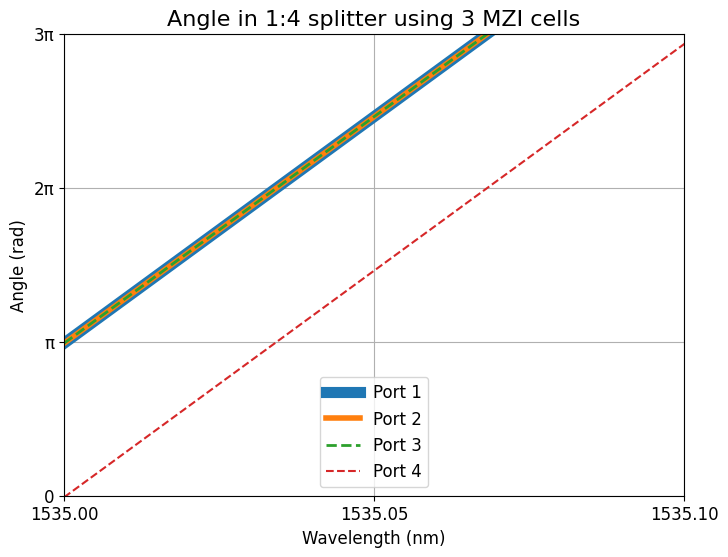

In [181]:
plt.figure(figsize=(8,6))
plt.plot(WvArray,Port1Angle,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Angle,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Angle,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Angle,'--', label='Port 4')
dyArray = {'0':0 , 'π':pi , '2π':2*pi, '3π':3*pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Angle in 1:4 splitter using 3 MZI cells',fontsize=16)
dxArray = {'1535.00':1535 , '1535.05':1535.05 , '1535.10':1535.1}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
plt.ylim(0,3*pi)
plt.xlim(1535,1535+0.1)
plt.legend(loc='lower center')
plt.grid()

# MZI IMEC TOPS

In [46]:
inter.switchtolayout()
inter.deleteall()
inter.addelement('MZI Cell IMEC TOPS')
inter.set('x position',0)
inter.set('y position',300)
inter.addelement('Optical Network Analyzer')
inter.set('number of input ports',3)

inter.connect('ONA_1','output','TOPS_IMEC_CELL_1','port 1')
inter.connect('ONA_1','input 1','TOPS_IMEC_CELL_1','port 3')
inter.connect('ONA_1','input 2','TOPS_IMEC_CELL_1','port 4')
inter.connect('ONA_1','input 3','TOPS_IMEC_CELL_1','port 2')

inter.addelement('DC Source')
inter.set('x position',-100)
inter.set('y position',450)
inter.connect('DC_1','output','TOPS_IMEC_CELL_1','TOPS 1')

inter.addelement('Ground Source')
inter.set('x position',80)
inter.set('y position',500)
inter.connect('GND_1','output','TOPS_IMEC_CELL_1','TOPS 2')

1.0

  0%|          | 0/70 [00:00<?, ?it/s]

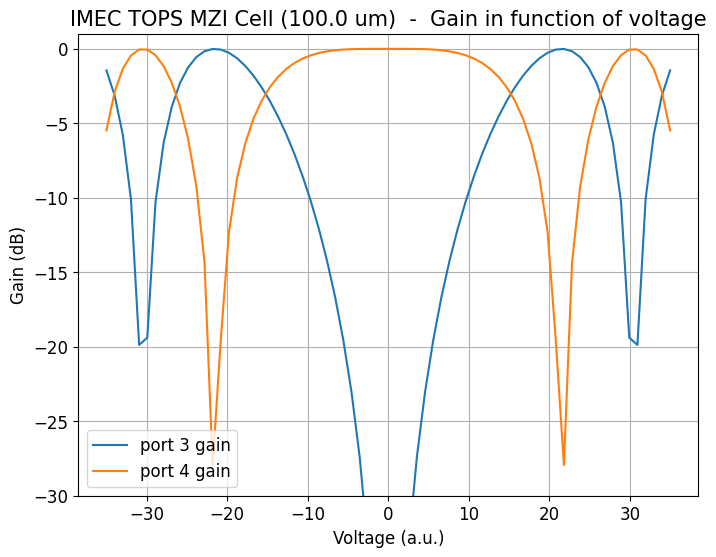

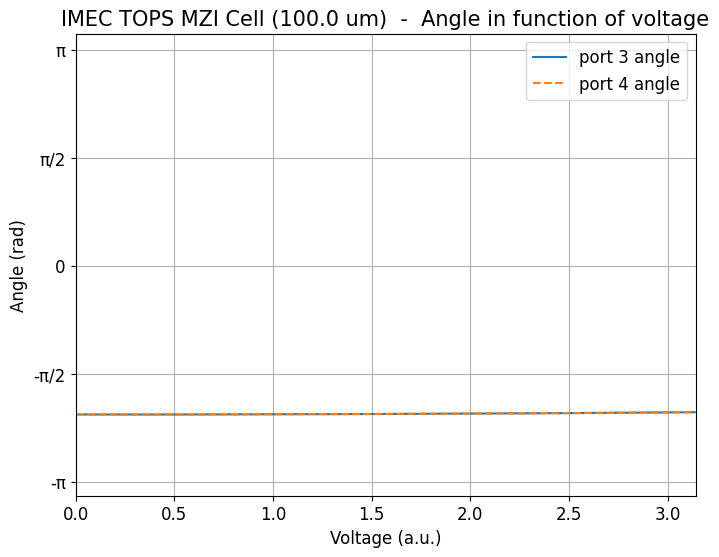

In [49]:
inter.switchtolayout()

VoltageArray = np.linspace(-35,35,70)
TOPSLen = 100e-6

progress = tqdm(total= len(VoltageArray))

Port1Gain = np.zeros(len(VoltageArray))
Port2Gain = np.zeros(len(VoltageArray))
Port1Angle = np.zeros(len(VoltageArray))
Port2Angle = np.zeros(len(VoltageArray))

inter.setnamed('TOPS_IMEC_CELL_1','TOPS Length',TOPSLen)

for i in range(len(VoltageArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',VoltageArray[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][0]
    Port1Angle[i] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]
    Port2Angle[i] = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

plt.figure(figsize=(8,6))
plt.plot(VoltageArray,Port1Gain,label='port 3 gain')
plt.plot(VoltageArray,Port2Gain,label='port 4 gain')
plt.xlabel('Voltage (a.u.)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title(f'IMEC TOPS MZI Cell ({np.round(TOPSLen*1e6,0)} um)  -  Gain in function of voltage',fontsize=15)
plt.ylim(-30,1)
plt.legend()
plt.grid()

datapath = '../Media/IMEC TOPS MZI'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain x voltage (" + str(np.round(TOPSLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")


plt.figure(figsize=(8,6))
plt.plot(VoltageArray,Port1Angle,label='port 3 angle')
plt.plot(VoltageArray,Port2Angle,'--',label='port 4 angle')
plt.xlabel('Voltage (a.u.)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title(f'IMEC TOPS MZI Cell ({np.round(TOPSLen*1e6,0)} um)  -  Angle in function of voltage',fontsize=15)
dyArray = {'-π':-pi , '-π/2':-pi/2, '0':0, 'π/2':pi/2, 'π':pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlim(0,pi)
plt.legend()
plt.grid()

datapath = '../Media/IMEC TOPS MZI'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Angle x voltage (" + str(np.round(TOPSLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")

1X4 Splitter using 3 cells with IMEC TOPS (voltage applied on upper TOPS = 21.5 a.u.)

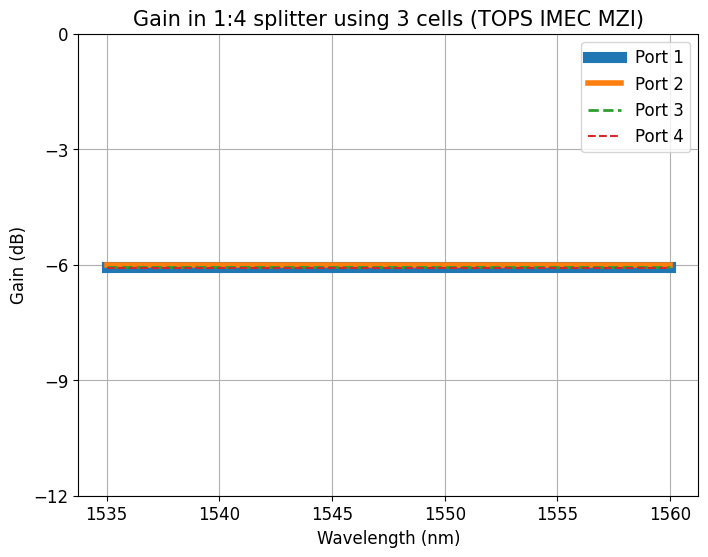

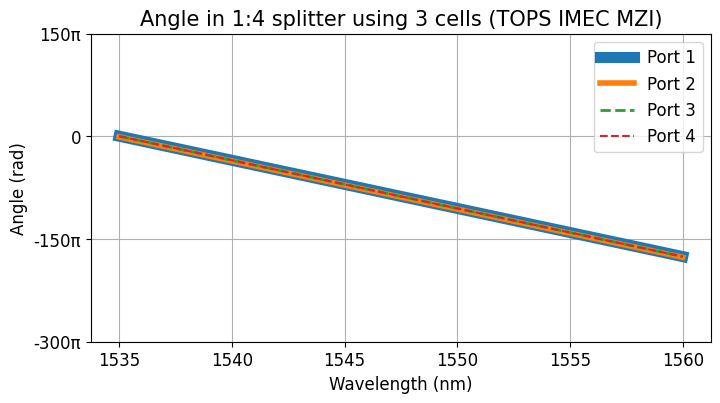

In [63]:
inter.switchtolayout()
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)']
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)']
Port3Gain = inter.getresult('ONA_1','input 3/mode 1/gain')['TE gain (dB)']
Port4Gain = inter.getresult('ONA_1','input 4/mode 1/gain')['TE gain (dB)']

Port1Angle = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)']
Port2Angle = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)']
Port3Angle = inter.getresult('ONA_1','input 3/mode 1/angle')['TE angle (rad)']
Port4Angle = inter.getresult('ONA_1','input 4/mode 1/angle')['TE angle (rad)']

plt.figure(figsize=(8,6))
plt.plot(WvArray,Port1Gain,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Gain,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Gain,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Gain,'--', label='Port 4')
dyArray = [0,-3,-6,-9,-12]
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Gain in 1:4 splitter using 3 cells (TOPS IMEC MZI)',fontsize=15)
plt.yticks(dyArray)
plt.legend()
plt.grid()

datapath = '../Media/IMEC TOPS MZI'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

plt.figure(figsize=(8,4))
plt.plot(WvArray,Port1Angle,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Angle,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Angle,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Angle,'--', label='Port 4')
dyArray = {'-300π':-300*pi, '-150π':-150*pi , '0':0 , '150π':150*pi }
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Angle in 1:4 splitter using 3 cells (TOPS IMEC MZI)',fontsize=15)
plt.legend()
plt.grid()

datapath = '../Media/IMEC TOPS MZI'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Angle x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

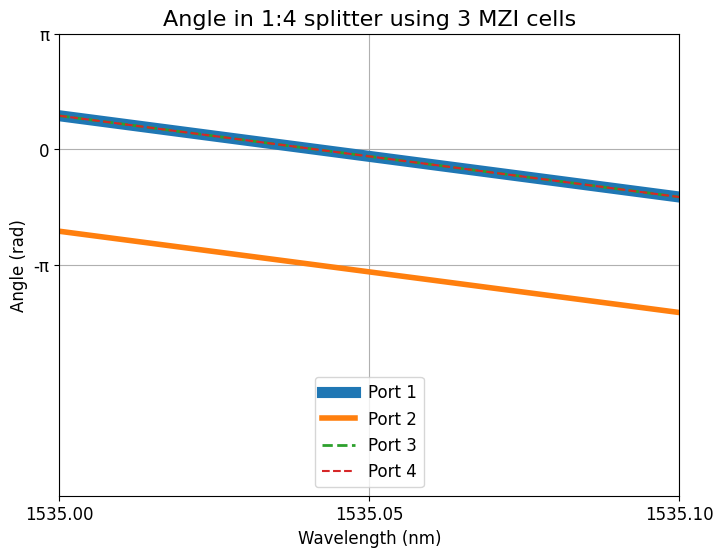

In [41]:
plt.figure(figsize=(8,6))
plt.plot(WvArray,Port1Angle,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Angle,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Angle,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Angle,'--', label='Port 4')
dyArray = {'-π':-pi, '0':0 , 'π':pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Angle in 1:4 splitter using 3 MZI cells',fontsize=16)
dxArray = {'1535.00':1535 , '1535.05':1535.05 , '1535.10':1535.1}
plt.xticks(list(dxArray.values()), labels=dxArray.keys())
plt.ylim(-3*pi,pi)
plt.xlim(1535,1535+0.1)
plt.legend(loc='lower center')
plt.grid()

# MZI EBeam heater

## Heater analysis

Reffer to device in EBeam cml:  *EBeam/wg_heater*

Downloadable in: https://github.com/SiEPIC/SiEPIC_EBeam_PDK

In [3]:
inter.switchtolayout()
inter.deleteall()
inter.addelement('wg_heater')
inter.set('x position',0)
inter.set('y position',300)
inter.addelement('Optical Network Analyzer')

inter.connect('ONA_1','output','wg_heater_1','opt_1')
inter.connect('ONA_1','input 1','wg_heater_1','opt_2')

inter.addelement('DC Source')
inter.set('x position',-100)
inter.set('y position',450)
inter.connect('DC_1','output','wg_heater_1','ele_1')

inter.addelement('Ground Source')
inter.set('x position',80)
inter.set('y position',500)
inter.connect('GND_1','output','wg_heater_1','ele_2')

1.0

  0%|          | 0/71 [00:00<?, ?it/s]

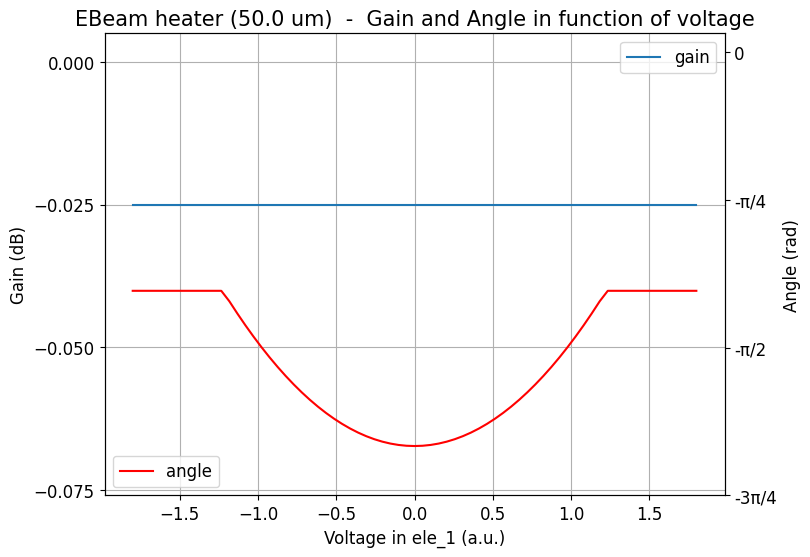

In [100]:
inter.switchtolayout()

VoltageArray = np.linspace(-1.8,1.8,71)
heaterLen = 50e-6

progress = tqdm(total= len(VoltageArray))

Port1Gain = np.zeros(len(VoltageArray))
Port1Angle = np.zeros(len(VoltageArray))

inter.setnamed('wg_heater_1','wg_length',heaterLen)

for i in range(len(VoltageArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',VoltageArray[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port1Angle[i] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(VoltageArray,Port1Gain,label='gain')
ax1.set_xlabel('Voltage in ele_1 (a.u.)',fontsize=12)
ax1.set_ylabel('Gain (dB)',fontsize=12)
dy1Array = [-0.075,-0.05,-0.025,0]
ax1.set_yticks(dy1Array)
ax1.set_ylim(-0.076,0.005)

ax2 = ax1.twinx()
ax2.plot(VoltageArray,Port1Angle, label='angle', color='red')
ax2.set_ylabel('Angle (rad)',fontsize=12)
dy2Array = {'-3π/4':-3*pi/4, '-π/2':-pi/2, '-π/4':-pi/4, '0':0}
ax2.set_yticks(list(dy2Array.values()), labels=dy2Array.keys())
ax2.set_ylim(-3*pi/4,0.1)

ax1.set_title(f'EBeam heater ({np.round(heaterLen*1e6,0)} um)  -  Gain and Angle in function of voltage',fontsize=15)
ax1.legend()
ax2.legend(loc='lower left')
ax1.grid()

datapath = '../Media/EBeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain_Angle x voltage (" + str(np.round(heaterLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")

  0%|          | 0/200 [00:00<?, ?it/s]

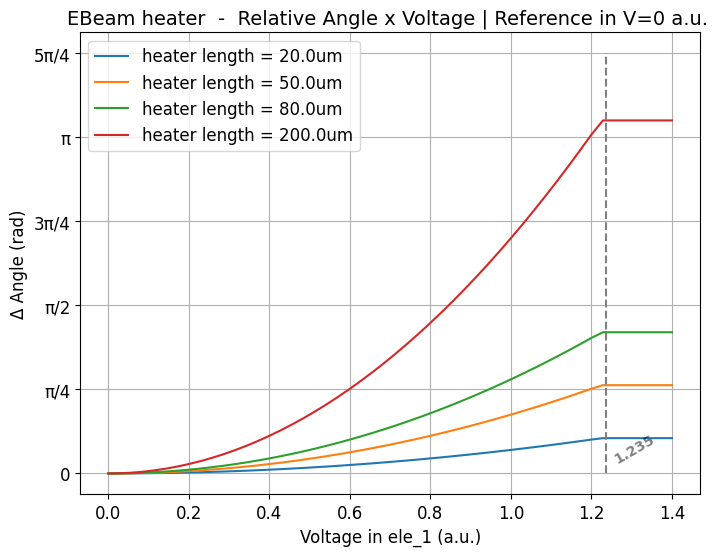

In [102]:
inter.switchtolayout()

VoltageArray = np.linspace(0,1.4,50)
hLenArray = np.array([20,50,80,200])*1e-6

progress = tqdm(total= len(VoltageArray)*len(hLenArray))

Port1Angle = np.zeros((len(VoltageArray),len(hLenArray)))

for j in range(len(hLenArray)):
    inter.switchtolayout()
    inter.setnamed('wg_heater_1','wg_length',hLenArray[j])
    for i in range(len(VoltageArray)):
        inter.switchtolayout()
        inter.setnamed('DC_1','amplitude',VoltageArray[i])
        inter.run()

        Port1Angle[i,j] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]

        progress.update(1)

plt.figure(figsize=(8,6))
plt.xlabel('Voltage in ele_1 (a.u.)',fontsize=12)
plt.ylabel('Δ Angle (rad)',fontsize=12)
dyArray = {'0':0, 'π/4':pi/4, 'π/2':pi/2, '3π/4':3*pi/4, 'π':pi, '5π/4':5*pi/4}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())

for j in range(len(hLenArray)):
    plt.plot(VoltageArray,Port1Angle[:,j]-Port1Angle[0,j], label=f'heater length = {np.round(hLenArray[j]*1e6,1)}um')

plt.vlines(1.235,ymin=0,ymax=5*pi/4,color='gray',linestyles='--')
plt.text(1.25,0.1,'1.235',alpha=0.5,fontsize=10,rotation=30,fontweight='bold')
plt.title(f'EBeam heater  -  Relative Angle x Voltage | Reference in V=0 a.u. ',fontsize=14)
plt.legend()
plt.grid()

datapath = '../Media/EBeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Angle x voltage x Length.png", transparent=False, facecolor="white", bbox_inches="tight")

  0%|          | 0/10 [00:00<?, ?it/s]

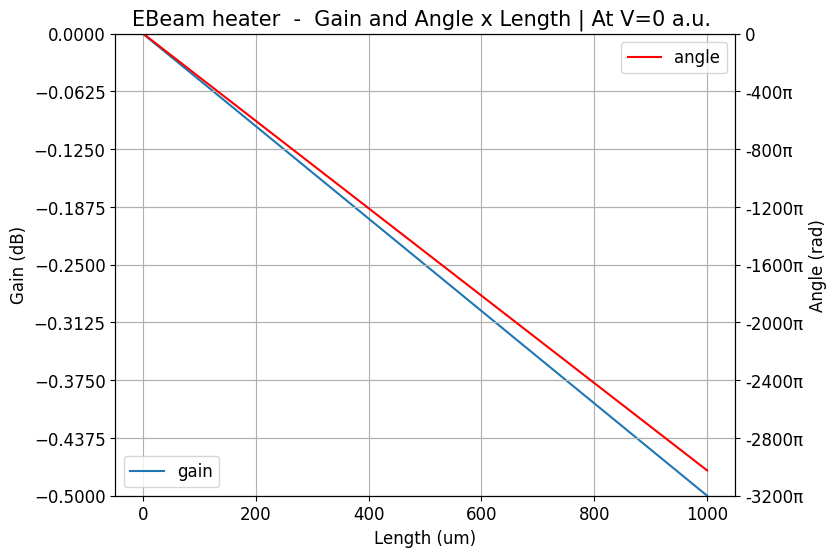

In [161]:
inter.switchtolayout()

VoltageArray = np.linspace(0,0,1)
hLenArray = np.linspace(1e-6,1000e-6,10)

progress = tqdm(total= len(hLenArray))

Port1Gain = np.zeros((1,len(hLenArray)))
Port1Angle = np.zeros((1,len(hLenArray)))

inter.setnamed('DC_1','amplitude',0)

for j in range(len(hLenArray)):
    inter.switchtolayout()
    inter.setnamed('wg_heater_1','wg_length',hLenArray[j])
    inter.run()

    Port1Gain[0,j] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    # Port1Angle[0,j] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot(hLenArray*1e6,Port1Gain[0,:],label='gain')
ax1.set_xlabel('Length (um)',fontsize=12)
ax1.set_ylabel('Gain (dB)',fontsize=12)
dy1Array = np.linspace(-0.5,0,9)
ax1.set_yticks(dy1Array)
ax1.set_ylim(-0.5,0)

AngleModel = 6.45077 - 9.508573*hLenArray*1e6  # Model considering linear phase variation in low wg lengths

ax2 = ax1.twinx()
# ax2.plot(hLenArray*1e6,np.unwrap(Port1Angle[0,:]), label='angle', color='red')
ax2.plot(hLenArray*1e6,AngleModel, label='angle', color='red')
ax2.set_ylabel('Angle (rad)',fontsize=12)
dy2Array = {'-3200π':-3200*pi,'-2800π':-2800*pi,'-2400π':-2400*pi,'-2000π':-2000*pi, '-1600π':-1600*pi, '-1200π':-1200*pi, '-800π':-800*pi, '-400π':-400*pi, '0':0,}
ax2.set_yticks(list(dy2Array.values()), labels=dy2Array.keys())
ax2.set_ylim(-3200*pi,0)

ax1.set_title(f'EBeam heater  -  Gain and Angle x Length | At V=0 a.u. ',fontsize=15)
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
ax1.grid()
ax2.grid()

datapath = '../Media/EBeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain_Angle x Length (V=0).png", transparent=False, facecolor="white", bbox_inches="tight")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


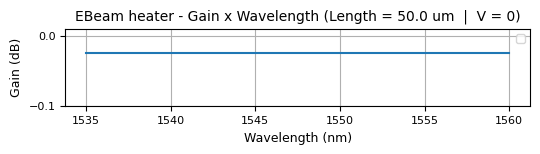

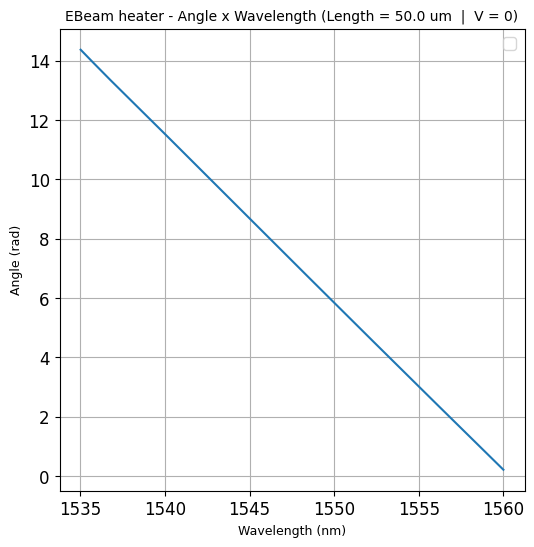

In [225]:
inter.switchtolayout()

Voltage = 0
heaterLen = 50e-6
WvLenRange = [1535e-9,1560e-9]
ONAPoints = 1000

Port1Gain = np.zeros(ONAPoints)
Port1Angle = np.zeros(ONAPoints)

inter.setnamed('DC_1','amplitude',Voltage)
inter.setnamed('wg_heater_1','wg_length',heaterLen)

inter.setnamed('ONA_1','input parameter','start and stop')
inter.setnamed('ONA_1','start frequency',c/WvLenRange[1])
inter.setnamed('ONA_1','stop frequency',c/WvLenRange[0])
inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)']
Port1Angle= inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)']
WavelenArray = inter.getresult('ONA_1','input 1/mode 1/gain')['wavelength']

plt.rc('font', size=8)

plt.figure(figsize=(6,1))
plt.plot(WavelenArray*1e9,Port1Gain)
plt.xlabel('Wavelength (nm)',fontsize=9)
plt.ylabel('Gain (dB)',fontsize=9)
plt.title(f'EBeam heater - Gain x Wavelength (Length = {np.round(heaterLen*1e6,0)} um  |  V = {Voltage})',fontsize=10)
plt.ylim(-0.1,0.01)
plt.legend()
plt.grid()

datapath = '../Media/EBeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"Gain x Wavelength (" + str(np.round(heaterLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")

plt.rc('font', size=12)

plt.figure(figsize=(6,6))
plt.plot(WavelenArray*1e9,Port1Angle)
plt.xlabel('Wavelength (nm)',fontsize=9)
plt.ylabel('Angle (rad)',fontsize=9)
plt.title(f'EBeam heater - Angle x Wavelength (Length = {np.round(heaterLen*1e6,0)} um  |  V = {Voltage})',fontsize=10)
plt.legend()
plt.grid()

## MZI with EBeam heater

In [184]:
inter.switchtolayout()
inter.deleteall()
inter.addelement('EBEAM_heat_CELL')
inter.set('x position',0)
inter.set('y position',300)
inter.addelement('Optical Network Analyzer')
inter.set('number of input ports',3)

inter.connect('ONA_1','output','EBEAM_heat_CELL_1','port 1')
inter.connect('ONA_1','input 1','EBEAM_heat_CELL_1','port 3')
inter.connect('ONA_1','input 2','EBEAM_heat_CELL_1','port 4')
inter.connect('ONA_1','input 3','EBEAM_heat_CELL_1','port 2')

inter.addelement('DC Source')
inter.set('x position',-100)
inter.set('y position',450)
inter.connect('DC_1','output','EBEAM_heat_CELL_1','heater1')

inter.addelement('Ground Source')
inter.set('x position',80)
inter.set('y position',500)
inter.connect('GND_1','output','EBEAM_heat_CELL_1','heater2')

1.0

  0%|          | 0/120 [00:00<?, ?it/s]

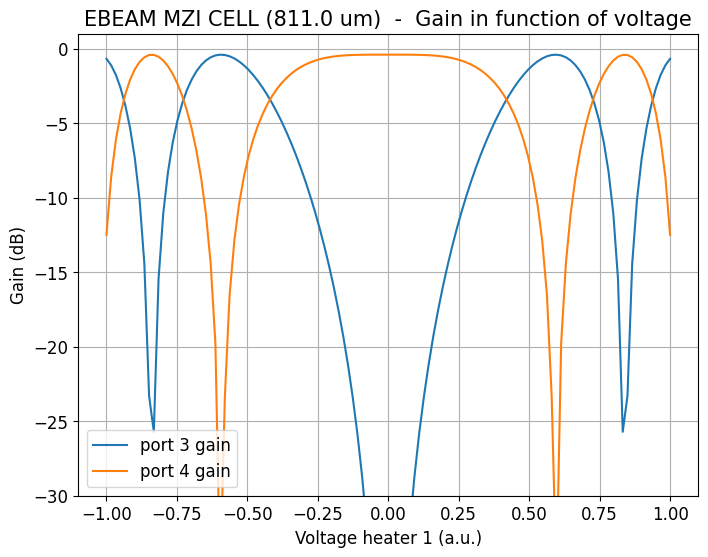

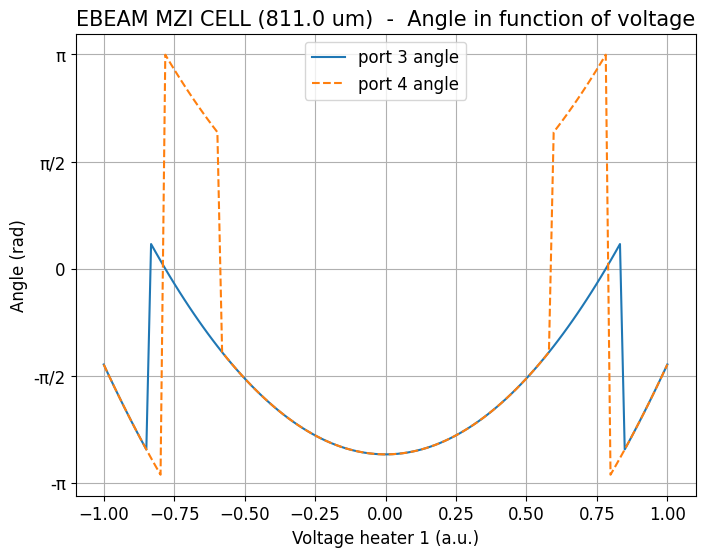

In [193]:
inter.switchtolayout()

VoltageArray = np.linspace(-1,1,120)
TOPSLen = 811e-6

progress = tqdm(total= len(VoltageArray))

Port1Gain = np.zeros(len(VoltageArray))
Port2Gain = np.zeros(len(VoltageArray))
Port1Angle = np.zeros(len(VoltageArray))
Port2Angle = np.zeros(len(VoltageArray))

inter.setnamed('EBEAM_heat_CELL_1','Waveguide Length',TOPSLen)

for i in range(len(VoltageArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',VoltageArray[i])
    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][0]
    Port1Angle[i] = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)'][0]
    Port2Angle[i] = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)'][0]

    progress.update(1)

plt.figure(figsize=(8,6))
plt.plot(VoltageArray,Port1Gain,label='port 3 gain')
plt.plot(VoltageArray,Port2Gain,label='port 4 gain')
plt.xlabel('Voltage heater 1 (a.u.)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title(f'EBEAM MZI CELL ({np.round(TOPSLen*1e6,0)} um)  -  Gain in function of voltage',fontsize=15)
plt.ylim(-30,1)
plt.legend()
plt.grid()

datapath = '../Media/Ebeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI_Gain x voltage (" + str(np.round(TOPSLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")


plt.figure(figsize=(8,6))
plt.plot(VoltageArray,Port1Angle,label='port 3 angle')
plt.plot(VoltageArray,Port2Angle,'--',label='port 4 angle')
plt.xlabel('Voltage heater 1 (a.u.)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title(f'EBEAM MZI CELL ({np.round(TOPSLen*1e6,0)} um)  -  Angle in function of voltage',fontsize=15)
dyArray = {'-π':-pi , '-π/2':-pi/2, '0':0, 'π/2':pi/2, 'π':pi}
plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.legend()
plt.grid()

datapath = '../Media/Ebeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"MZI_Angle x voltage (" + str(np.round(TOPSLen*1e6,0)) + " um).png", transparent=False, facecolor="white", bbox_inches="tight")

## EBeam MZI Splitter 1:4

In [226]:
WvArray = np.linspace(1535,1560,1000)

inter.switchtolayout()
inter.deleteall()

inter.addelement('EBEAM_heat_CELL')
inter.set('x position',-300)
inter.set('y position',-300)
inter.addelement('EBEAM_heat_CELL')
inter.set('x position',0)
inter.set('y position',-400)
inter.addelement('EBEAM_heat_CELL')
inter.set('x position',0)
inter.set('y position',-200)

inter.addelement('Optical Network Analyzer')
inter.set('x position',-400)
inter.set('y position',-600)
inter.set('number of input ports',4)

inter.addelement('Termination Mirror')
inter.set('x position',-500)
inter.set('y position',-200)
inter.flipelement('TERM_1')
inter.addelement('Termination Mirror')
inter.set('x position',-200)
inter.set('y position',-100)
inter.flipelement('TERM_2')
inter.addelement('Termination Mirror')
inter.set('x position',-200)
inter.set('y position',-500)
inter.flipelement('TERM_3')

inter.connect('ONA_1','output','EBEAM_heat_CELL_1','port 1')
inter.connect('ONA_1','input 1','EBEAM_heat_CELL_2','port 3')
inter.connect('ONA_1','input 2','EBEAM_heat_CELL_2','port 4')
inter.connect('ONA_1','input 3','EBEAM_heat_CELL_3','port 3')
inter.connect('ONA_1','input 4','EBEAM_heat_CELL_3','port 4')

inter.connect('EBEAM_heat_CELL_1','port 3','EBEAM_heat_CELL_2','port 2')
inter.connect('EBEAM_heat_CELL_1','port 4','EBEAM_heat_CELL_3','port 1')

inter.connect('TERM_1','port','EBEAM_heat_CELL_1','port 2')
inter.connect('TERM_2','port','EBEAM_heat_CELL_3','port 2')
inter.connect('TERM_3','port','EBEAM_heat_CELL_2','port 1')

inter.setnamed('ONA_1','input parameter','start and stop')

inter.addelement('DC Source')
inter.set('x position',-600)
inter.set('y position',-500)
inter.connect('DC_1','output','EBEAM_heat_CELL_1','heater1')
inter.connect('DC_1','output','EBEAM_heat_CELL_2','heater1')
inter.connect('DC_1','output','EBEAM_heat_CELL_3','heater1')
inter.addelement('Ground Source')
inter.set('x position',300)
inter.connect('GND_1','output','EBEAM_heat_CELL_1','heater2')
inter.connect('GND_1','output','EBEAM_heat_CELL_2','heater2')
inter.connect('GND_1','output','EBEAM_heat_CELL_3','heater2')

1.0

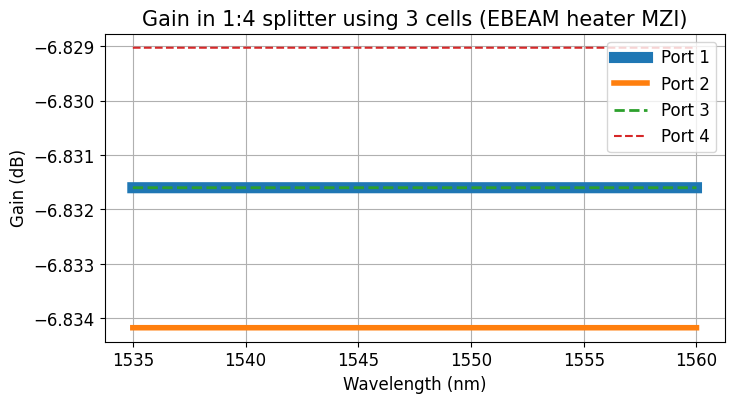

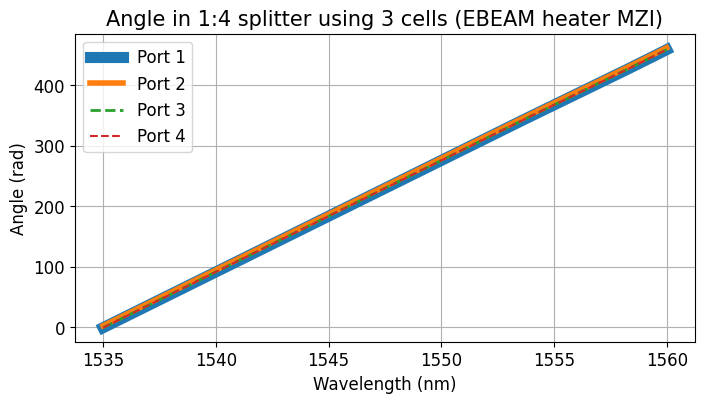

In [270]:
inter.switchtolayout()
inter.setnamed('DC_1','amplitude',0.4196)

WvArray = np.linspace(1535,1560,30000)
inter.setnamed('ONA_1','number of points',len(WvArray))
inter.setnamed('ONA_1','start frequency',c/(WvArray[0]*1e-9))
inter.setnamed('ONA_1','stop frequency',c/(WvArray[-1]*1e-9))

inter.run()

Port1Gain = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)']
Port2Gain = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)']
Port3Gain = inter.getresult('ONA_1','input 3/mode 1/gain')['TE gain (dB)']
Port4Gain = inter.getresult('ONA_1','input 4/mode 1/gain')['TE gain (dB)']

Port1Angle = inter.getresult('ONA_1','input 1/mode 1/angle')['TE angle (rad)']
Port2Angle = inter.getresult('ONA_1','input 2/mode 1/angle')['TE angle (rad)']
Port3Angle = inter.getresult('ONA_1','input 3/mode 1/angle')['TE angle (rad)']
Port4Angle = inter.getresult('ONA_1','input 4/mode 1/angle')['TE angle (rad)']

plt.figure(figsize=(8,4))
plt.plot(WvArray,Port1Gain,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Gain,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Gain,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Gain,'--', label='Port 4')
# dyArray = [-3,-4.5,-6,-7.5,-9,-10.5,-12]
# plt.yticks(dyArray)
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Gain in 1:4 splitter using 3 cells (EBEAM heater MZI)',fontsize=15)
plt.legend()
plt.grid()

datapath = '../Media/Ebeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Gain x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

plt.figure(figsize=(8,4))
plt.plot(WvArray,Port1Angle,'-',linewidth=8, label='Port 1')
plt.plot(WvArray,Port2Angle,'-',linewidth=4, label='Port 2')
plt.plot(WvArray,Port3Angle,'--',linewidth=2, label='Port 3')
plt.plot(WvArray,Port4Angle,'--', label='Port 4')
# dyArray = {'-300π':-300*pi, '-150π':-150*pi , '0':0 , '150π':150*pi }
# plt.yticks(list(dyArray.values()), labels=dyArray.keys())
plt.xlabel('Wavelength (nm)',fontsize=12)
plt.ylabel('Angle (rad)',fontsize=12)
plt.title('Angle in 1:4 splitter using 3 cells (EBEAM heater MZI)',fontsize=15)
plt.legend()
plt.grid()

datapath = '../Media/Ebeam_heater'
file_count = sum(len(files) for _, _, files in os.walk(datapath))
plt.savefig(datapath+"/"+"1x4 splitter - Angle x Wavelength" + ".png", transparent=False, facecolor="white", bbox_inches="tight")

  0%|          | 0/7 [00:00<?, ?it/s]

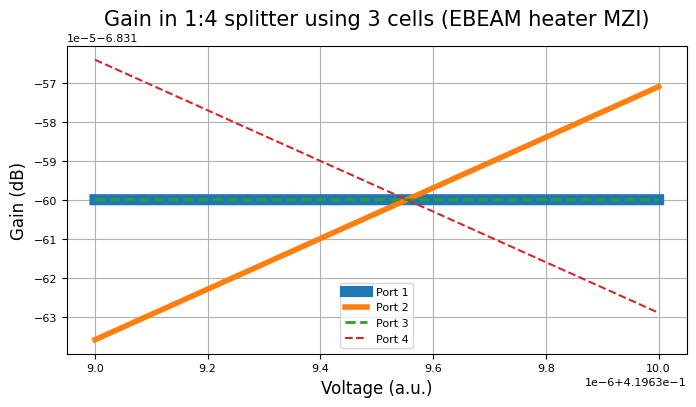

In [268]:
inter.switchtolayout()
AmpArray = np.linspace(0.419639,0.419640,7)

Port1Gain = np.zeros(len(AmpArray))
Port2Gain = np.zeros(len(AmpArray))
Port3Gain = np.zeros(len(AmpArray))
Port4Gain = np.zeros(len(AmpArray))

progress = tqdm(total= len(AmpArray))

WvArray = np.linspace(1535,1560,10)
inter.setnamed('ONA_1','number of points',len(WvArray))
inter.setnamed('ONA_1','start frequency',c/(WvArray[0]*1e-9))
inter.setnamed('ONA_1','stop frequency',c/(WvArray[-1]*1e-9))

for i in range(len(AmpArray)):
    inter.switchtolayout()
    inter.setnamed('DC_1','amplitude',AmpArray[i])

    inter.run()

    Port1Gain[i] = inter.getresult('ONA_1','input 1/mode 1/gain')['TE gain (dB)'][0]
    Port2Gain[i] = inter.getresult('ONA_1','input 2/mode 1/gain')['TE gain (dB)'][0]
    Port3Gain[i] = inter.getresult('ONA_1','input 3/mode 1/gain')['TE gain (dB)'][0]
    Port4Gain[i] = inter.getresult('ONA_1','input 4/mode 1/gain')['TE gain (dB)'][0]

    progress.update(1)

plt.rc('font', size=8)

plt.figure(figsize=(8,4))
plt.plot(AmpArray,Port1Gain,'-',linewidth=8, label='Port 1')
plt.plot(AmpArray,Port2Gain,'-',linewidth=4, label='Port 2')
plt.plot(AmpArray,Port3Gain,'--',linewidth=2, label='Port 3')
plt.plot(AmpArray,Port4Gain,'--', label='Port 4')
# dyArray = [-3,-4.5,-6,-7.5,-9,-10.5,-12]
# plt.yticks(dyArray)
plt.xlabel('Voltage (a.u.)',fontsize=12)
plt.ylabel('Gain (dB)',fontsize=12)
plt.title('Gain in 1:4 splitter using 3 cells (EBEAM heater MZI)',fontsize=15)
plt.legend()
plt.grid()

plt.rc('font', size=12)